<a href="https://colab.research.google.com/github/Antu0/Computational-Geoscience/blob/main/CG_Trap_Efficiency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt


The trap efficiency is 36.06 %


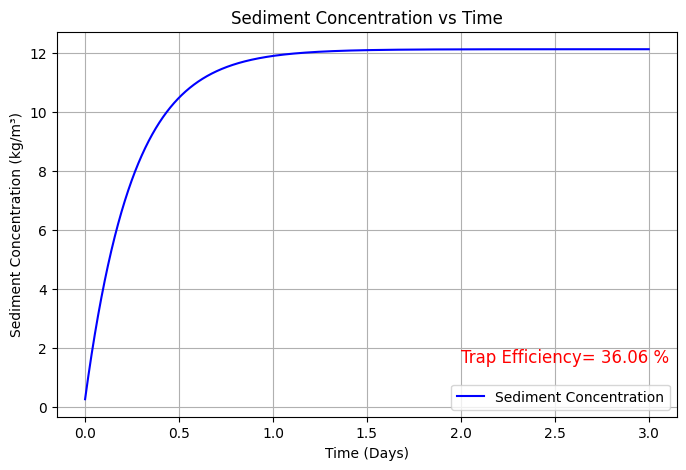

In [2]:
#Given

V = 14400000     #Reservoir Volume (m3)
D = 5     #Mean depth of water (m)
ds = 0.00001   #Sediment diameter(m)
wd = 1000    #Water density (kg/m3)
sd = 2650    #Sediment Density (kg/m3)
vis = 0.001   #Viscosity (kg/(m-s))
Qi = 400   #River discharge (m3/s)
C0 = 0.265    #Initial sediment concentration (kg/m3)
Ci = 20    #Average sediment concentration in the flood water (kg/m3)
tmax = 3    #Duration of flood(days)
g = 9.81   #gravitational acceleration (m/s2)

#from Stokes Law

Ws = (2/9)* ((sd-wd)/vis)*g*((ds/2)**2)

Tf= V/Qi

Ts= D/Ws

B= 1/Tf + 1/Ts

Ce = Ci/(1+(Tf/Ts))

#Create an array for t
sec = 24*60*60
t = np.linspace(0, 3*sec, 5000)

Ct = Ce - ((Ce-C0)*(np.exp(-B*t)))


#Trap Efficiency

a= Tf/(Tf+Ts)
b= 1-(C0/Ce)
c= 1- (np.exp(-B*tmax*sec))


TE= a*(1-((b*c)/(B*tmax*sec)))

Tp= TE*100

print(f"The trap efficiency is {Tp:.2f} %")


# Plot
plt.figure(figsize=(8,5))
plt.plot(t/sec, Ct, label="Sediment Concentration", color='blue')  # t/60 to convert seconds to minute
plt.text(2,1.5, f'Trap Efficiency= {Tp:.2f} %', fontsize=12, color='red')
plt.xlabel('Time (Days)')
plt.ylabel('Sediment Concentration (kg/m³)')
plt.title('Sediment Concentration vs Time')
plt.legend()
plt.grid(True)
plt.show()